

# Investigate the FBI Gun Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

*The data comes from the **FBI's National Instant Criminal Background Check System.** **The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives**. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.*

***Questions :*** 
>- *What is the overall trend of gun purchases?*
- *How many total checks have there been in each state since 1998?*
- *What is the total annual payroll of all the states in 2015?*
- *What is the average revenue of firms of all the states in 2012?*
- *What census data is most associated with high gun per capita?*
- *Which states have had the highest growth in gun registrations?*
- *How many guns were registered in total in January?*
- *What is the sum of registered gun in each state over time?*

In [506]:
# Loading thelibraries
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [507]:
# Loading the data
us_df = pd.read_csv('U.S. Census Data.csv')

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, the following work will be done: load the data; check for cleanliness; trim and clean dataset for analysis.

### General Properties

In [508]:
# Load data and print out a few lines
us_df.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [509]:
# loading excel file
gun_df = pd.ExcelFile('gun_data.xlsx')
gun_df = gun_df.parse("Sheet1")
gun_df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [510]:
# return a tuple of the dimensions of the dataframe.
us_df.shape, gun_df.shape

((85, 52), (12485, 27))

In [511]:
# print the column labels in the dataframe.
us_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [512]:
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [513]:
# check for duplicates in the data.

sum(us_df.duplicated()), sum(gun_df.duplicated())

(3, 0)

In [514]:
#  check if any value is NaN in DataFrame and in how many columns

us_df.isnull().any().any(), sum(us_df.isnull().any())

(True, 52)

In [515]:
gun_df.isnull().any().any(), sum(gun_df.isnull().any())

(True, 23)

In [516]:
gun_df.isnull().any().sum()

23

In [517]:
# Generates descriptive statistics, excluding NaN values.
us_df.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Female persons, percent, April 1, 2010",(c),11.80%,7.30%,50.30%,50.90%,50.30%,3.30%,0.10%,51.60%,...,1210,0.048,50.40%,2.50%,"625,741","39,490.09",50.20%,1.50%,11.80%,7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [518]:
gun_df.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


### Data Cleaning 

In [519]:
# drop duplicates
# Confirm changes
us_df.drop_duplicates(inplace=True)
gun_df.drop_duplicates(inplace=True)
sum(us_df.duplicated()), sum(gun_df.duplicated())

(0, 0)

In [520]:
# Change column name in gun_df into lower case for the convenience of analysis
# Confirm changes
us_df.rename(columns = lambda x: x.lower(), inplace = True)
us_df.head()

,fact,fact note,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,...,south dakota,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [521]:
# Changing string column types to numeric data types.
column = us_df.iloc[:,2:].columns
for c in column:
    us_df[c] = us_df[c].str.extract('(\d+)').astype(float)
# comfirm changes
us_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fact            80 non-null     object 
 1   fact note       28 non-null     object 
 2   alabama         65 non-null     float64
 3   alaska          64 non-null     float64
 4   arizona         65 non-null     float64
 5   arkansas        65 non-null     float64
 6   california      65 non-null     float64
 7   colorado        65 non-null     float64
 8   connecticut     65 non-null     float64
 9   delaware        65 non-null     float64
 10  florida         65 non-null     float64
 11  georgia         65 non-null     float64
 12  hawaii          64 non-null     float64
 13  idaho           65 non-null     float64
 14  illinois        65 non-null     float64
 15  indiana         65 non-null     float64
 16  iowa            65 non-null     float64
 17  kansas          65 non-null     float

In [522]:
# Replace the all NaN in df with 'No Record' 
us_df.fillna('No record', inplace = True)

# Confirm changes 
us_df.isnull().any().sum()

0

In [523]:
column = gun_df.iloc[:, np.r_[2:7, 8:26]].columns
for c in column:
    c_mean = gun_df[c].mean()
    gun_df[c].fillna(c_mean, inplace = True)
    
# Confirm changes
gun_df.isnull().any().sum()

0

In [524]:
# Convert string into datatime format in gun_df
gun_df.month = pd.to_datetime(gun_df['month'], errors = 'coerce')

# Confirm changes
gun_df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


## Exploratory Data Analysis

### *What is the overall trend of gun purchases?*

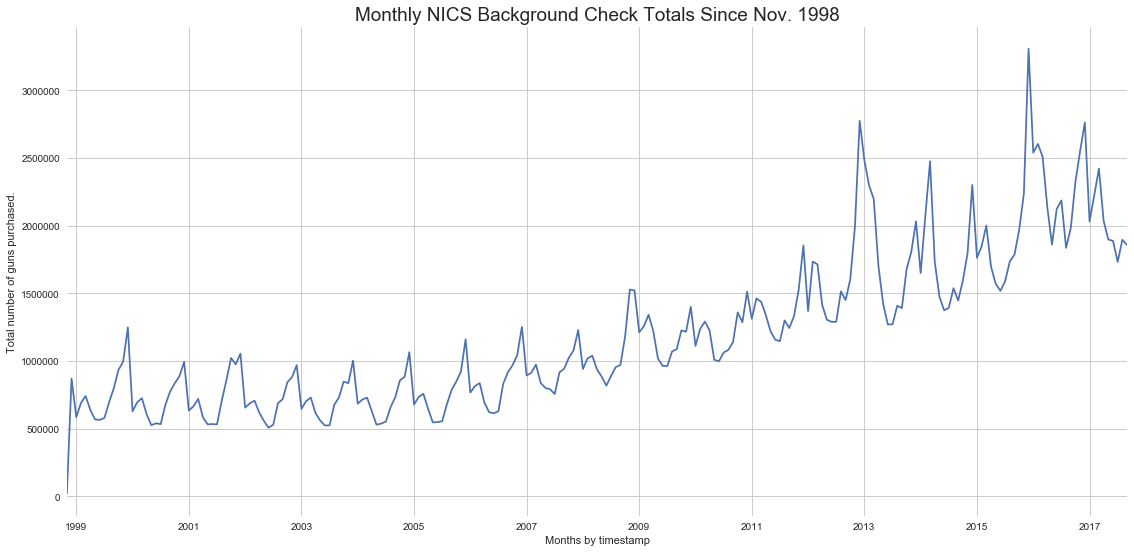

In [525]:
# sum the totals by month
totals = gun_df.groupby("month")["totals"].sum()

# plot graph
sns.set_style(style = 'whitegrid')
totals.plot(figsize=(19, 9))


plt.title("Monthly NICS Background Check Totals Since Nov. 1998", fontsize = 19)
plt.ylabel("Total number of guns purchased.")
plt.xlabel("Months by timestamp");

- *The visualization shows an increase in background checks since 1998.* 
- *Each spike shows that gun sales greatly increase in December of each year.* 
- ***The greatest spike being in 2015 due to Black Friday sales. In a report, it was found that Black Friday in 2015 broke a record in a single 24-hour period with a total of 185,345 background checks processed, or slightly more than two background checks every second.***

### *How many total checks have there been in each state since 1998?*

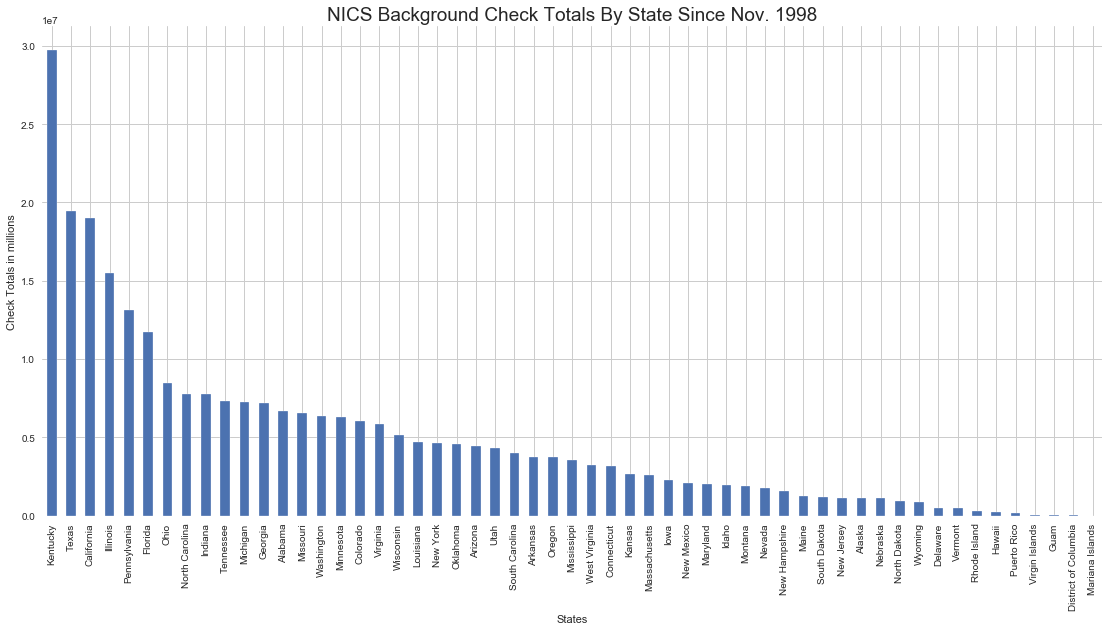

In [526]:
# group the states and sum the totals
state_totals = gun_df.groupby(['state', 'month'])['totals'].sum().reset_index().groupby('state')['totals'].sum().sort_values(ascending = False)

# plot graph
state_totals.plot(kind = 'bar', figsize=(19,9))

plt.title("NICS Background Check Totals By State Since Nov. 1998", fontsize = 19)
plt.ylabel('Check Totals in millions')
plt.xlabel('States');

- ***As we can see in graph, Kentucky has the most activity in background checks for guns since 1998. The state is known to have the least restrictive gun control laws compared to other states.***
- *In a summary of gun laws in Kentucky, you do not need a state permit to purchase, you do not need to register your firearm, there is no assault weapon law, magazine capacity restriction, and an owner license is not required.* 
- *In a report, Kentucky has the nation's highest percentage of legislators who got a least an A-minus grade from the NRA. This rating system gives members of Congress a grade ranging from A to F that reflects their voting record on gun rights.*
- ***In Texas and California, the second and third highest state that has activity of firearm background checks on the graph, as these states are one of the violent states in the U.S.***

<a id='q3'></a>
### *What is the total annual payroll of all the states in 2015?*

In [527]:
# printing the row with the annual payroll of the states.
us_df[52:53]

,fact,fact note,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,...,south dakota,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
52,"Total annual payroll, 2015 ($1,000)",Includes data not distributed by county.,67,15,102,39,856,117,92,21,...,1.3813e+07,1.10481e+08,521,51,10,165,149,22,112,10


In [528]:
# total annual payroll of all the states. 
us_df.iloc[52, 2:].sum()

1531393139.0

***The total annual payroll of all states in 2015 is 1531393139 (1000, $).***

<a id='q4'></a>
### *What is the average revenue of firms of all the states in 2012?*

In [529]:
# average revenue of firms by states.
us_df.iloc[55:56]

,fact,fact note,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,...,south dakota,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
55,"All firms, 2012",No record,374,68,499,231,3,547,326,73,...,81314,550453,2,251,75,653,541,114,432,62


In [530]:
# average revenue of all the states
us_df.iloc[55, 2:].mean()

133749.26

In [531]:
# Looks like major cities have high revenue
us_df.iloc[55]

fact              All firms, 2012
fact note               No record
alabama                       374
alaska                         68
arizona                       499
arkansas                      231
california                      3
colorado                      547
connecticut                   326
delaware                       73
florida                         2
georgia                       929
hawaii                        118
idaho                         146
illinois                        1
indiana                       479
iowa                          259
kansas                        239
kentucky                      331
louisiana                     414
maine                         139
maryland                      531
massachusetts                 607
michigan                      834
minnesota                     489
mississippi                   235
missouri                      491
montana                       112
nebraska                      164
nevada        

In [532]:
# lets only check the revenue by removing those
df = us_df.copy()
df = df.drop(['new mexico', 'new york', 'north carolina', 'north dakota', 'ohio', 
              'oklahoma', 'oregon', 'pennsylvania', 'rhode island', 'south carolina', 
              'south dakota', 'tennessee'], axis = 1)
df.iloc[55, 2:].mean()

313.7105263157895

- ***The average revenue of firms of all the states in 2012 is around 133749.26.***
- ***The average revenue of firms of all the states after removing major states in 2012 is around 313.710.***

### *What census data is most associated with high gun per capita?*

In [533]:
# Synchronize both dataframe at 2010
state_df1 = gun_df.query('month == "2010-04-01"').state.str.lower().tolist()
state_df = us_df.iloc[3, 2:].index.tolist()

In [534]:
# Compare the element difference in column of state
miss_state = []
def miss_states(state):
    for s in state:
        if s not in state_df:
               miss_state.append(s)
    return miss_state
miss_states(state_df1)

['district of columbia',
 'guam',
 'mariana islands',
 'puerto rico',
 'virgin islands']

In [535]:
# Convert all vaules in column of'state' from df1 in lower case in order to match
# the format in column of 'state' from df for later calculatation
gun_df['state'] = gun_df.state.str.lower()

In [536]:
# Use query to select common elements in columns of state from both dataframe
gun_total_2010 = gun_df.query('month == "2010-04-01" & state != @miss_state')

In [537]:
gun_total_2010.set_index('state', inplace = True)

In [538]:
avg_2010 = gun_total_2010.totals/us_df.iloc[3, 2:]

In [539]:
# Printing value
avg_2010.loc['utah']

54695.5

***The highest gun per capita was 54695.5, that occurred at Utah in 2010.***

In [540]:
# Foror 2016
# Synchronize both dataframe at 2016
state_df1_2016 = gun_df.query('month == "2016-07-01"').state.str.lower().tolist()
state_df_2016 = us_df.iloc[0, 2:].index.tolist()

In [541]:
# Compare the element difference in columns of state
miss_state_2016 = []
def miss_states(state):
    for s in state:
        if s not in state_df_2016:
               miss_state_2016.append(s)
    return miss_state_2016
miss_states(state_df1_2016)

['district of columbia',
 'guam',
 'mariana islands',
 'puerto rico',
 'virgin islands']

In [542]:
# Use query to select common elements in columns of 'state' from both dataframe
gun_total_2016 = gun_df.query('month == "2016-07-01" & state != @miss_state')

In [543]:
gun_total_2016.set_index('state', inplace = True)

In [544]:
avg_2016 = gun_total_2016.totals/us_df.iloc[0, 2:]

In [545]:
# Printing value
avg_2010.loc['kentucky']

52815.25

***The highest gun per capita was 52815.25, that occurred at kentucky in 2016.***

### *Which states have had the highest growth in gun registrations?*

In [546]:
# Grouping by time, state and sum of totals
gun_all = gun_df.groupby(['month', 'state'])['totals'].sum()

In [547]:
# Find out the Earliest and latest registration date
current = gun_df['month'].max()
early = gun_df['month'].min()

In [548]:
# The amount of registed guns between current and earliest
gun_growth_total = gun_all.loc[current] - gun_all.loc[early]

# Find out the index of maximum value
gun_growth_total.idxmax()

'kentucky'

In [549]:
# Printting exact numbers
gun_growth_total.loc['kentucky']

397866

***Kentucky have had the highest growth in gun registrations over time, and the total registed number of guns is 397866 to date.***

### *How many guns were registered in total in January?*

In [550]:
# Extract month from datetime column (month)
month_data = gun_df.month.dt.strftime("%B")
test = gun_df.copy()
test['registed_month']= month_data

In [551]:
# Find all the rows in January and February and sum the totals
# Use substration to find the answer
feb_gun = test.query('registed_month == "February"')
jan_gun = test.query('registed_month == "January"')
feb_gun.totals.sum() - jan_gun.totals.sum()

1792105

***The total registered guns in January was 1792105 pieces. That's a lot of guns.***

### *What is the sum of registered gun in each state over time?*

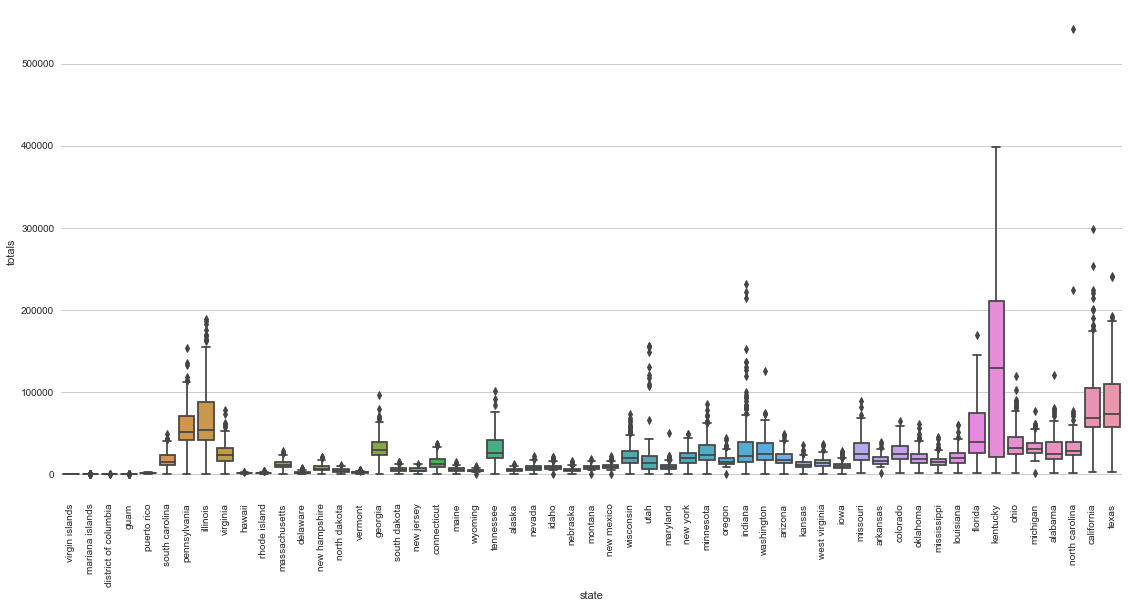

In [552]:
plt.figure(figsize=(19,9))
plt.xticks(rotation = 90);
df = gun_df.sort_values(by = ['totals'])
sns.boxplot(x = 'state', y = 'totals', data = df);

## Conclusions
*In this study, a good amount of profound analysis has been carried out. The data was ranging from 1998 to 2017, which consisted of detailed information of registered gun. Based on such substantial data, the analysis would be more reliable as opposed to small scale analysis.* 

**Summary:**
>- *The visualization shows an increase in background checks since 1998.* 
- *Each spike shows that gun sales greatly increase in December of each year.* 
- *The greatest spike being in 2015 due to Black Friday sales.*
- *As we can see in graph, **Kentucky** has the most activity in background checks for guns since 1998.* 
- *In **Texas and California**, the second and third highest state that has activity of firearm background checks on the graph.*
- *The total annual payroll of all states in 2015 is **1531393139 (1000, $)**.*
- *The average revenue of firms of all the states in 2012 is around 133749.26.*
- *The average revenue of firms of all the states after removing major states in 2012 is around **313.710**.*
- *The highest gun per capita was **54695.5, that occurred at Utah** in 2010.*
- *The highest gun per capita was **52815.25, that occurred at kentucky** in 2016.*
- *kentucky have had the highest growth in gun registrations over time, and the **total registed number of guns is 397866** to date.*
- *The **total registered guns in January was 1792105 pieces.** That's a lot of guns.*

In [553]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_FBI_Gun_Dataset_20200614.ipynb'])

0